In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os


In [2]:
weatherfile = '/Users/sangeetajayakar/Springboard_Course/Files_for_second_capstone/weatherAUS.csv'
# obtained from kaggle https://www.kaggle.com/jsphyg/weather-dataset-rattle-package


In [12]:
df = pd.read_csv(weatherfile)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [30]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [31]:
len(df['Location'].unique())

49

In [32]:
raindataSydney = raindata[raindata['Location']=='Sydney']
raindataSydney.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [33]:
raindataSydney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344 entries, 30176 to 33519
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3344 non-null   object 
 1   Location       3344 non-null   object 
 2   MinTemp        3340 non-null   float64
 3   MaxTemp        3342 non-null   float64
 4   Rainfall       3337 non-null   float64
 5   Evaporation    3293 non-null   float64
 6   Sunshine       3328 non-null   float64
 7   WindGustDir    2306 non-null   object 
 8   WindGustSpeed  2306 non-null   float64
 9   WindDir9am     3288 non-null   object 
 10  WindDir3pm     3311 non-null   object 
 11  WindSpeed9am   3318 non-null   float64
 12  WindSpeed3pm   3319 non-null   float64
 13  Humidity9am    3329 non-null   float64
 14  Humidity3pm    3331 non-null   float64
 15  Pressure9am    3323 non-null   float64
 16  Pressure3pm    3325 non-null   float64
 17  Cloud9am       2776 non-null   float64
 18  Clo

,MinTemp
count,143975.000000
mean,12.194034
std,6.398495
min,-8.500000
25%,7.600000
50%,12.000000
75%,16.900000
max,33.900000


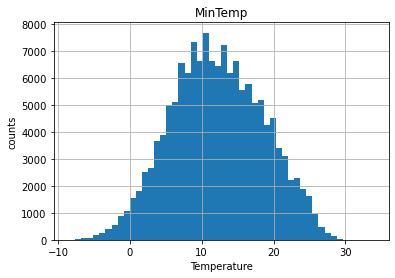

In [38]:
ax = (df['MinTemp']).hist(bins=50) 
ax.set_ylabel('counts')
ax.set_xlabel('Temperature')
ax.set_title('MinTemp')
pd.DataFrame(df['MinTemp'].describe())

,mean,std
RainToday,,
No,11.994339,6.503178
Yes,12.851734,6.003064


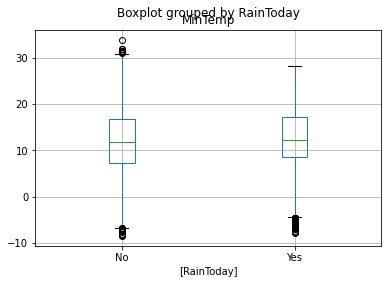

In [39]:
df.boxplot(column=['MinTemp'],by = ['RainToday'])
pd.DataFrame(df.groupby( ['RainToday'])['MinTemp'].describe().loc[:,['mean','std']])

<AxesSubplot:title={'center':'Records for each Location'}, xlabel='Location', ylabel='Count'>

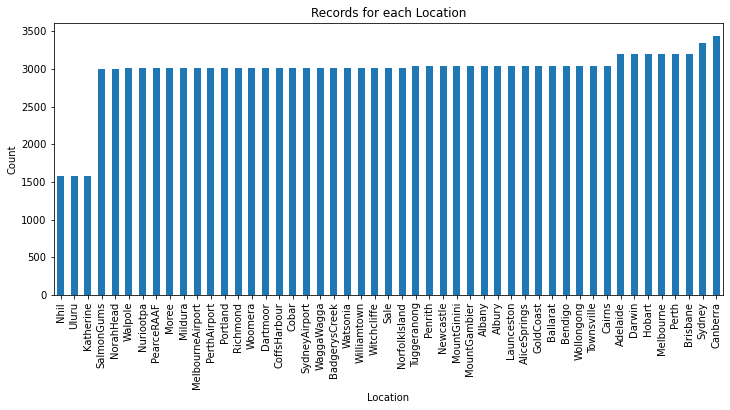

In [64]:
#df.groupby(['Location'])['Location'].count().plot(kind='bar').set_ylabel('Count')
#df.groupby(['Location' ])[['Location']].count()

# How many records or rows are there for each location? 
cities = df.groupby(['Location'])['Location'].count().sort_values()
cities
#df.groupby(['Location'])['Location'].count().sort_values().plot(kind='bar').set_ylabel('Count')
cities.plot(kind='bar', figsize=[12,5], ylabel='Count', title='Records for each Location')


In [27]:
# Change Yes and No to 1 and 0
#this should be moved to earlier up in the wrangling.... 

df['rain_No'] = df['RainToday'] == 'Yes'
df['rain_No'].head()

0    False
1    False
2    False
3    False
4    False
Name: rain_No, dtype: bool

In [28]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,rain_No
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,False
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,False
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,False
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,False
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,False


,rain_No
Location,
Adelaide,0.215785
Albany,0.296711
Albury,0.202961
AliceSprings,0.080263
BadgerysCreek,0.193752
Ballarat,0.256908
Bendigo,0.184868
Brisbane,0.222048
Cairns,0.312500


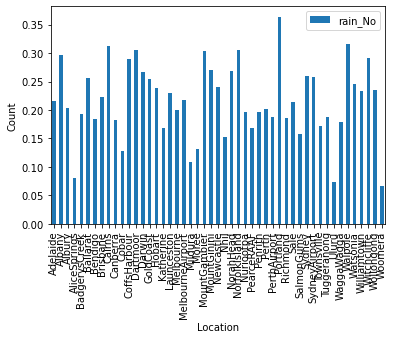

In [25]:
df.groupby(['Location'])[['rain_No']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['Location' ])[['rain_No']].mean()

In [ ]:
# df.groupby([ 'Pclass'])[['Survived']].mean().plot(kind='bar').set_ylabel('Count')
# df.groupby(['Pclass' ])[['Survived']].mean()

,Location,RainToday,RainTomorrow
RainToday,,,
No,110319,110319,109332
Yes,31880,31880,31455


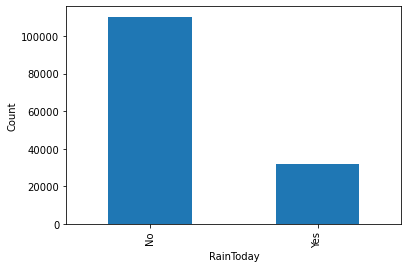

In [47]:
df.groupby(['RainToday'])['RainToday'].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['RainToday' ])[['Location','RainToday','RainTomorrow']].count()

In [40]:
df.groupby(['RainTomorrow'])[['RainTomorrow']].count()

,RainTomorrow
RainTomorrow,
No,110316
Yes,31877


In [41]:
df.groupby(['RainToday'])[['RainTomorrow']].count()

,RainTomorrow
RainToday,
No,109332
Yes,31455


In [42]:
df.groupby(['RainTomorrow'])[['RainToday']].count()

,RainToday
RainTomorrow,
No,109586
Yes,31201


### Figure for each variable

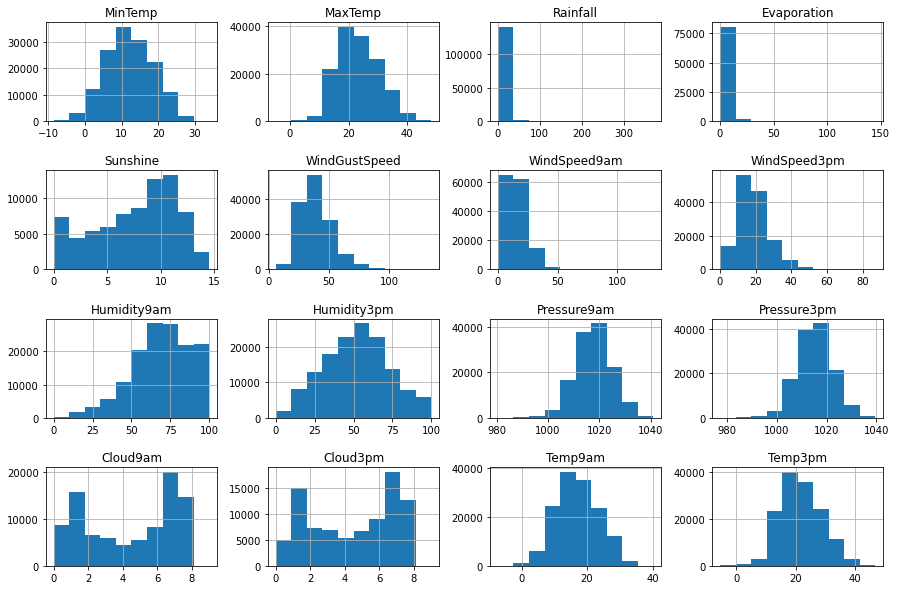

In [9]:
#Call `hist` method to plot histograms of each of the numeric features
raindata.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);